In [1]:
import pandas as pd
from pathlib import Path

In [2]:
pillar_spliceAI_snv_file = Path("/data/dzeiberg/pillar_project/dataframe/pillar_data_clinvar38_annotated_final_v13_expanded_031425_X_SpliceAI_SNV.vcf.gz")
pillar_spliceAI_indel_file = Path("/data/dzeiberg/pillar_project/dataframe/pillar_data_clinvar38_annotated_final_v13_expanded_031425_X_SpliceAI_INDEL.vcf.gz")
pillar_project_csv = Path("/data/dzeiberg/pillar_project/dataframe/pillar_data_clinvar38_annotated_final_v13_expanded_031425.csv")

In [3]:
def parse_spliceAI_INFO(info_value):
    """
    Parse the SpliceAI value from the INFO column and return a dictionary.
    """
    if "SpliceAI=" in info_value:
        spliceAI_data = info_value.split("SpliceAI=")[1]
        fields = spliceAI_data.split("|")
        return {
            "Allele": fields[0],
            "Gene": fields[1],
            "DS_AG": float(fields[2]),
            "DS_AL": float(fields[3]),
            "DS_DG": float(fields[4]),
            "DS_DL": float(fields[5]),
            "DP_AG": int(fields[6]),
            "DP_AL": int(fields[7]),
            "DP_DG": int(fields[8]),
            "DP_DL": int(fields[9]),
            "SpliceAI_score": max(float(fields[2]), float(fields[3]), float(fields[4]), float(fields[5])),
        }
    return {}

def parse_splice_ai(vcf_filepath):
    spliceAI_df = pd.read_csv(vcf_filepath, sep="\t", comment="#", header=None)
    spliceAI_df.columns = ["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO"]


    # Apply the parse_spliceAI function and expand the resulting dictionary into separate columns
    parsed_columns = spliceAI_df["INFO"].apply(parse_spliceAI_INFO).apply(pd.Series)

    # Add the parsed columns to the spliceAI_df dataframe
    spliceAI_df = pd.concat([spliceAI_df, parsed_columns], axis=1)
    return spliceAI_df

In [4]:
spliceai_snv = parse_splice_ai(pillar_spliceAI_snv_file)
spliceai_indel = parse_splice_ai(pillar_spliceAI_indel_file)

/tmp/ipykernel_1752762/289674951.py:24: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  spliceAI_df = pd.read_csv(vcf_filepath, sep="\t", comment="#", header=None)


In [22]:
pillar_df = pd.read_csv(pillar_project_csv)

/tmp/ipykernel_1752762/2042239911.py:1: DtypeWarning: Columns (4,11,13,14,15,21,22,23,34,37,38,39,40,43) have mixed types. Specify dtype option on import or set low_memory=False.
  pillar_df = pd.read_csv(pillar_project_csv)


In [23]:
pillar_df.shape

(1053714, 44)

In [24]:
spliceai_precompute_results = pd.concat((spliceai_snv, spliceai_indel), axis=0)

In [25]:
spliceai_precompute_results

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,Allele,Gene,DS_AG,DS_AL,DS_DG,DS_DL,DP_AG,DP_AL,DP_DG,DP_DL,SpliceAI_score
0,1,11022277,TARDBP_Bolognesi_Faure_2019_var464869,G,A,.,.,SpliceAI=A|TARDBP|0.00|0.00|0.01|0.00|-36|0|-36|0,A,TARDBP,0.0,0.0,0.01,0.0,-36,0,-36,0,0.01
1,1,11022277,TARDBP_Bolognesi_Faure_2019_var464868,G,C,.,.,SpliceAI=C|TARDBP|0.00|0.00|0.02|0.00|42|0|42|0,C,TARDBP,0.0,0.0,0.02,0.0,42,0,42,0,0.02
2,1,11022277,TARDBP_Bolognesi_Faure_2019_var465493,G,T,.,.,SpliceAI=T|TARDBP|0.00|0.00|0.02|0.00|42|0|-27|0,T,TARDBP,0.0,0.0,0.02,0.0,42,0,-27,0,0.02
3,1,11022278,TARDBP_Bolognesi_Faure_2019_var464874,G,A,.,.,SpliceAI=A|TARDBP|0.00|0.00|0.03|0.00|41|-1|-3...,A,TARDBP,0.0,0.0,0.03,0.0,41,-1,-37,-1,0.03
4,1,11022278,TARDBP_Bolognesi_Faure_2019_var464875,G,C,.,.,SpliceAI=C|TARDBP|0.00|0.00|0.01|0.00|41|-1|41|-1,C,TARDBP,0.0,0.0,0.01,0.0,41,-1,41,-1,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6547,X,41347723,DDX3X_Radford_2023_cLFC_day15_var196280,TGC,T,.,.,SpliceAI=T|DDX3X|0.00|0.00|0.00|0.00|-27|10|-1...,T,DDX3X,0.0,0.0,0.00,0.0,-27,10,-12,12,0.00
6548,X,41347725,DDX3X_Radford_2023_cLFC_day15_var196287,CTT,C,.,.,SpliceAI=C|DDX3X|0.00|0.00|0.00|0.00|-29|8|-14|6,C,DDX3X,0.0,0.0,0.00,0.0,-29,8,-14,6,0.00
6549,X,41347727,DDX3X_Radford_2023_cLFC_day15_var196294,TTG,T,.,.,SpliceAI=T|DDX3X|0.00|0.00|0.00|0.00|9|6|-16|4,T,DDX3X,0.0,0.0,0.00,0.0,9,6,-16,4,0.00
6550,X,41347729,DDX3X_Radford_2023_cLFC_day15_var196301,GCA,G,.,.,SpliceAI=G|DDX3X|0.00|0.00|0.02|0.00|0|4|0|2,G,DDX3X,0.0,0.0,0.02,0.0,0,4,0,2,0.02


In [26]:
spliceai_precompute_results.ID.unique().shape

(137188,)

In [27]:
pillar_df.ID.unique().shape

(444909,)

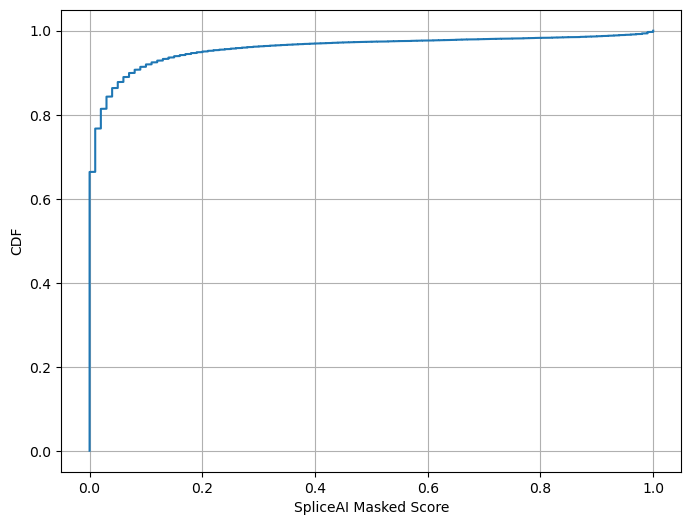

In [29]:
import numpy as np

import matplotlib.pyplot as plt

# Extract the values
# values = spliceAI_snv.loc[:, ['DS_AG', 'DS_AL', 'DS_DG', 'DS_DL']].max(axis=1)

# Calculate the ECDF
x = np.sort(spliceai_precompute_results.sort_values("SpliceAI_score").drop_duplicates("ID",keep='first').SpliceAI_score)
y = np.arange(1, len(x) + 1) / len(x)

# Plot the ECDF
plt.figure(figsize=(8, 6))
plt.plot(x,y)
plt.xlabel("SpliceAI Masked Score")
plt.ylabel("CDF")
# plt.title("Empirical Cumulative Distribution Function (ECDF)")
plt.grid()
plt.show()

In [30]:
spliceai_max_scores = spliceai_precompute_results.sort_values("SpliceAI_score").drop_duplicates("ID",keep='first')

In [31]:
spliceai_max_scores

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,Allele,Gene,DS_AG,DS_AL,DS_DG,DS_DL,DP_AG,DP_AL,DP_DG,DP_DL,SpliceAI_score
85783,17,7670673,TP53_Boettcher_2019_var456236,C,G,.,.,SpliceAI=G|TP53|0.00|0.00|0.00|0.00|45|42|17|33,G,TP53,0.0,0.0,0.00,0.0,45,42,17,33,0.0
85797,17,7670682,TP53_Boettcher_2019_var456176,C,A,.,.,SpliceAI=A|TP53|0.00|0.00|0.00|0.00|-3|33|24|-35,A,TP53,0.0,0.0,0.00,0.0,-3,33,24,-35,0.0
85796,17,7670681,TP53_Boettcher_2019_var456177,T,G,.,.,SpliceAI=G|TP53|0.00|0.00|0.00|0.00|-11|34|25|18,G,TP53,0.0,0.0,0.00,0.0,-11,34,25,18,0.0
85795,17,7670681,TP53_Boettcher_2019_var456178,T,C,.,.,SpliceAI=C|TP53|0.00|0.00|0.00|0.00|37|34|25|-3,C,TP53,0.0,0.0,0.00,0.0,37,34,25,-3,0.0
85794,17,7670681,TP53_Boettcher_2019_var456179,T,A,.,.,SpliceAI=A|TP53|0.00|0.00|0.00|0.00|34|-2|2|18,A,TP53,0.0,0.0,0.00,0.0,34,-2,2,18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25140,3,52402600,BAP1_Waters_2024_var171656,A,T,.,.,SpliceAI=T|BAP1|0.00|0.00|0.01|1.00|5|10|-16|2,T,BAP1,0.0,0.0,0.01,1.0,5,10,-16,2,1.0
25141,3,52402601,BAP1_Waters_2024_var171655,C,A,.,.,SpliceAI=A|BAP1|0.00|0.00|0.10|1.00|-43|4|2|1,A,BAP1,0.0,0.0,0.10,1.0,-43,4,2,1,1.0
30556,3,52406827,BAP1_Waters_2024_var166240,A,C,.,.,SpliceAI=C|BAP1|0.00|0.00|0.01|1.00|2|50|24|2,C,BAP1,0.0,0.0,0.01,1.0,2,50,24,2,1.0
31857,3,52407956,BAP1_Waters_2024_var164939,A,T,.,.,SpliceAI=T|BAP1|0.00|0.00|0.00|1.00|16|2|16|2,T,BAP1,0.0,0.0,0.00,1.0,16,2,16,2,1.0


In [32]:
pillar_df_w_spliceai = pd.merge(pillar_df, 
                                spliceai_max_scores.loc[:,["CHROM", "POS", "ID", "REF", "ALT",
                                                           "DS_AG", "DS_AL", "DS_DG", "DS_DL",
                                                           "DP_AG", "DP_AL", "DP_DG", "DP_DL", "SpliceAI_score"]],
                                on="ID", how="left")

In [33]:
pillar_df_w_spliceai.SpliceAI_score.notnull().sum() / len(pillar_df_w_spliceai)

np.float64(0.23013550166363927)

In [34]:
pd.set_option('display.max_columns', None)

In [35]:
pillar_df_w_spliceai[pillar_df_w_spliceai.SpliceAI_score.isna()].loc[:,["Chrom", "hg38_start", "ID", "ref_allele", "alt_allele"]].assign(QUAL= ".",
                                                                                                                                         FILTER= ".",
                                                                                                                                         INFO= ".",).dropna(subset=['Chrom',"hg38_start",'ID','ref_allele','alt_allele']).astype(dict(Chrom=str,hg38_start=int,ID=str,
                                                                                                                                                                 ref_allele=str,alt_allele=str,
                                                                                                                                                                 QUAL=str,FILTER=str,INFO=str)).to_csv("/data/dzeiberg/pillar_project/dataframe/missing_spliceai.vcf",
                                                                                                                                                            sep="\t",
                                                                                                                                                            index=False,
                                                                                                                                                            header=["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO"])

In [36]:
pillar_df_w_spliceai

,ID,Dataset,Gene,HGNC_id,Chrom,STRAND,hg19_pos,hg38_start,hg38_end,ref_allele,alt_allele,auth_transcript_id,transcript_pos,transcript_ref,transcript_alt,aa_pos,aa_ref,aa_alt,hgvs_c,hgvs_p,consequence,auth_reported_score,auth_reported_rep_score,auth_reported_func_class,auth_reported_normal_min,auth_reported_normal_max,auth_reported_abnormal_min,auth_reported_abnormal_max,splice_measure,gnomad_MAF,clinvar_sig,clinvar_star,clinvar_date_last_reviewed,nucleotide_or_aa,MaveDB URN (score set),Ensembl_transript_ID,Ref_seq_transcript_ID,Model_system,Assay_type,Phenotype_measured,Phenotype_detail,IGVF_produced,simplified_consequence,Flag,CHROM,POS,REF,ALT,DS_AG,DS_AL,DS_DG,DS_DL,DP_AG,DP_AL,DP_DG,DP_DL,SpliceAI_score
0,ASPA_Grønbæk-Thygesen_2024_abundance_var288098,ASPA_Grønbæk-Thygesen_2024_abundance,ASPA,756.0,17,1.0,NaN,3476163.0,3476163.0,A,G,NaN,4,NaN,NaN,2,T,A,c.4A>G,p.Thr2Ala,missense_variant,0.9031,NaN,NaN,NaN,NaN,NaN,NaN,No,0.000002,NaN,NaN,NaN,aa,urn:mavedb:00000657-a-1,ENST00000263080.3,NM_000049.4,immortalized human cells,Reporter,Fluorescence,protein stability,No,Missense,NaN,17,3476163.0,A,G,0.0,0.0,0.0,0.0,-29.0,-22.0,35.0,-29.0,0.0
1,ASPA_Grønbæk-Thygesen_2024_abundance_var288098,ASPA_Grønbæk-Thygesen_2024_abundance,ASPA,756.0,17,1.0,NaN,3476163.0,3476165.0,ACT,GCC,NaN,4-6,NaN,NaN,2,T,A,c.4_6delinsGCC,p.Thr2Ala,missense_variant,0.9031,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,aa,urn:mavedb:00000657-a-1,ENST00000263080.3,NM_000049.4,immortalized human cells,Reporter,Fluorescence,protein stability,No,Missense,NaN,17,3476163.0,A,G,0.0,0.0,0.0,0.0,-29.0,-22.0,35.0,-29.0,0.0
2,ASPA_Grønbæk-Thygesen_2024_abundance_var288098,ASPA_Grønbæk-Thygesen_2024_abundance,ASPA,756.0,17,1.0,NaN,3476163.0,3476165.0,ACT,GCA,NaN,4-6,NaN,NaN,2,T,A,c.4_6delinsGCA,p.Thr2Ala,missense_variant,0.9031,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,aa,urn:mavedb:00000657-a-1,ENST00000263080.3,NM_000049.4,immortalized human cells,Reporter,Fluorescence,protein stability,No,Missense,NaN,17,3476163.0,A,G,0.0,0.0,0.0,0.0,-29.0,-22.0,35.0,-29.0,0.0
3,ASPA_Grønbæk-Thygesen_2024_abundance_var288098,ASPA_Grønbæk-Thygesen_2024_abundance,ASPA,756.0,17,1.0,NaN,3476163.0,3476165.0,ACT,GCG,NaN,4-6,NaN,NaN,2,T,A,c.4_6delinsGCG,p.Thr2Ala,missense_variant,0.9031,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,aa,urn:mavedb:00000657-a-1,ENST00000263080.3,NM_000049.4,immortalized human cells,Reporter,Fluorescence,protein stability,No,Missense,NaN,17,3476163.0,A,G,0.0,0.0,0.0,0.0,-29.0,-22.0,35.0,-29.0,0.0
4,ASPA_Grønbæk-Thygesen_2024_abundance_var288099,ASPA_Grønbæk-Thygesen_2024_abundance,ASPA,756.0,17,1.0,NaN,3476163.0,3476164.0,AC,TG,NaN,4-5,NaN,NaN,2,T,C,c.4_5delinsTG,p.Thr2Cys,missense_variant,0.4523,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,aa,urn:mavedb:00000657-a-1,ENST00000263080.3,NM_000049.4,immortalized human cells,Reporter,Fluorescence,protein stability,No,Missense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053709,PTEN_Mighell_2018_var96397,PTEN_Mighell_2018,PTEN,9588.0,10,1.0,NaN,87965467.0,87965469.0,GTC,ATT,NM_000314.6,1207-1209,NaN,NaN,403.0,V,I,c.1207_1209delinsATT,p.Val403Ile,missense_variant,-2.049575,NaN,0.0,-1.11,0.89,-5.76,-2.13,No,NaN,NaN,NaN,NaN,aa,urn:mavedb:00000054-a-1,ENST00000371953.8,NM_000314.6,yeast,Cell Viability,Cell growth,lipid phosphatase activity,No,Missense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1053710,PTEN_Mighell_2018_var96399,PTEN_Mighell_2018,PTEN,9588.0,10,1.0,NaN,87965467.0,87965469.0,GTC,ATG,NM_000314.6,1207-1209,NaN,NaN,403.0,V,M,c.1207_1209delinsATG,p.Val403Met,missense_variant,0.106511,NaN,1.0,-1.11,0.89,-5.76,-2.13,No,NaN,NaN,NaN,NaN,aa,urn:mavedb:00000054-a-1,ENST00000371953.8,NM_000314.6,yeast,Cell Viability,Cell growth,lipid phosphatase activity,No,Missense,NaN,Na

In [37]:
pillar_df

,ID,Dataset,Gene,HGNC_id,Chrom,STRAND,hg19_pos,hg38_start,hg38_end,ref_allele,alt_allele,auth_transcript_id,transcript_pos,transcript_ref,transcript_alt,aa_pos,aa_ref,aa_alt,hgvs_c,hgvs_p,consequence,auth_reported_score,auth_reported_rep_score,auth_reported_func_class,auth_reported_normal_min,auth_reported_normal_max,auth_reported_abnormal_min,auth_reported_abnormal_max,splice_measure,gnomad_MAF,clinvar_sig,clinvar_star,clinvar_date_last_reviewed,nucleotide_or_aa,MaveDB URN (score set),Ensembl_transript_ID,Ref_seq_transcript_ID,Model_system,Assay_type,Phenotype_measured,Phenotype_detail,IGVF_produced,simplified_consequence,Flag
0,ASPA_Grønbæk-Thygesen_2024_abundance_var288098,ASPA_Grønbæk-Thygesen_2024_abundance,ASPA,756.0,17,1.0,NaN,3476163.0,3476163.0,A,G,NaN,4,NaN,NaN,2,T,A,c.4A>G,p.Thr2Ala,missense_variant,0.9031,NaN,NaN,NaN,NaN,NaN,NaN,No,0.000002,NaN,NaN,NaN,aa,urn:mavedb:00000657-a-1,ENST00000263080.3,NM_000049.4,immortalized human cells,Reporter,Fluorescence,protein stability,No,Missense,NaN
1,ASPA_Grønbæk-Thygesen_2024_abundance_var288098,ASPA_Grønbæk-Thygesen_2024_abundance,ASPA,756.0,17,1.0,NaN,3476163.0,3476165.0,ACT,GCC,NaN,4-6,NaN,NaN,2,T,A,c.4_6delinsGCC,p.Thr2Ala,missense_variant,0.9031,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,aa,urn:mavedb:00000657-a-1,ENST00000263080.3,NM_000049.4,immortalized human cells,Reporter,Fluorescence,protein stability,No,Missense,NaN
2,ASPA_Grønbæk-Thygesen_2024_abundance_var288098,ASPA_Grønbæk-Thygesen_2024_abundance,ASPA,756.0,17,1.0,NaN,3476163.0,3476165.0,ACT,GCA,NaN,4-6,NaN,NaN,2,T,A,c.4_6delinsGCA,p.Thr2Ala,missense_variant,0.9031,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,aa,urn:mavedb:00000657-a-1,ENST00000263080.3,NM_000049.4,immortalized human cells,Reporter,Fluorescence,protein stability,No,Missense,NaN
3,ASPA_Grønbæk-Thygesen_2024_abundance_var288098,ASPA_Grønbæk-Thygesen_2024_abundance,ASPA,756.0,17,1.0,NaN,3476163.0,3476165.0,ACT,GCG,NaN,4-6,NaN,NaN,2,T,A,c.4_6delinsGCG,p.Thr2Ala,missense_variant,0.9031,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,aa,urn:mavedb:00000657-a-1,ENST00000263080.3,NM_000049.4,immortalized human cells,Reporter,Fluorescence,protein stability,No,Missense,NaN
4,ASPA_Grønbæk-Thygesen_2024_abundance_var288099,ASPA_Grønbæk-Thygesen_2024_abundance,ASPA,756.0,17,1.0,NaN,3476163.0,3476164.0,AC,TG,NaN,4-5,NaN,NaN,2,T,C,c.4_5delinsTG,p.Thr2Cys,missense_variant,0.4523,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,aa,urn:mavedb:00000657-a-1,ENST00000263080.3,NM_000049.4,immortalized human cells,Reporter,Fluorescence,protein stability,No,Missense,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053709,PTEN_Mighell_2018_var96397,PTEN_Mighell_2018,PTEN,9588.0,10,1.0,NaN,87965467.0,87965469.0,GTC,ATT,NM_000314.6,1207-1209,NaN,NaN,403.0,V,I,c.1207_1209delinsATT,p.Val403Ile,missense_variant,-2.049575,NaN,0.0,-1.11,0.89,-5.76,-2.13,No,NaN,NaN,NaN,NaN,aa,urn:mavedb:00000054-a-1,ENST00000371953.8,NM_000314.6,yeast,Cell Viability,Cell growth,lipid phosphatase activity,No,Missense,NaN
1053710,PTEN_Mighell_2018_var96399,PTEN_Mighell_2018,PTEN,9588.0,10,1.0,NaN,87965467.0,87965469.0,GTC,ATG,NM_000314.6,1207-1209,NaN,NaN,403.0,V,M,c.1207_1209delinsATG,p.Val403Met,missense_variant,0.106511,NaN,1.0,-1.11,0.89,-5.76,-2.13,No,NaN,NaN,NaN,NaN,aa,urn:mavedb:00000054-a-1,ENST00000371953.8,NM_000314.6,yeast,Cell Viability,Cell growth,lipid phosphatase activity,No,Missense,NaN
1053711,PTEN_Mighell_2018_var96402,PTEN_Mighell_2018,PTEN,9588.0,10,1.0,NaN,87965467.0,87965469.0,GTC,TGG,NM_000314.6,1207-1209,NaN,NaN,403.0,V,W,c.1207_1209delinsTGG,p.Val403Trp,missense_variant,-2.459162,NaN,0.0,-1.11,0.89,-5.76,-2.13,No,NaN,NaN,NaN,NaN,aa,urn:mavedb:00000054-a-1,ENST00000371953.8,NM_000314.6,yeast,Cell Viability,Cell growth,lipid phosphatase activity,No,Missense,NaN
1053712,PTEN_Mighell_2018_var96408,PTEN_Mighell_2018,PTEN,9588.0,10,1.0,NaN,87965468.0,879

In [38]:
pillar_project_spliceai_csv = Path("/data/dzeiberg/pillar_project/dataframe/pillar_data_clinvar38_annotated_final_v14_spliceai_032525.csv")

In [39]:
pillar_df_w_spliceai.to_csv(pillar_project_spliceai_csv, index=False)